# Read and build classifier

In [1]:
%matplotlib inline

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from subprocess import check_output
import chardet
import pandas as pd
import csv
import matplotlib.pyplot as plt

from scipy import stats

In [3]:
data=[] #will hold text
target=[] #will hold label
with open("./data/sentiment140.csv", encoding='latin1') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='"')
    for row in spamreader:
        data.append(row[5])
        target.append(0 if row[0]=="0" else 1)    
#print top rows            
for i in range (10):
    print ("row: %d label: %d text: %s" % (i,target[i],data[i]))    
#print average target
print ("average target %f " % (np.mean(target)))
#print len of data
print ("len of text data is %d  " % (len(data)))


# Any results you write to the current directory are saved as output.

row: 0 label: 0 text: @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D
row: 1 label: 0 text: is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!
row: 2 label: 0 text: @Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds
row: 3 label: 0 text: my whole body feels itchy and like its on fire 
row: 4 label: 0 text: @nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. 
row: 5 label: 0 text: @Kwesidei not the whole crew 
row: 6 label: 0 text: Need a hug 
row: 7 label: 0 text: @LOLTrish hey  long time no see! Yes.. Rains a bit ,only a bit  LOL , I'm fine thanks , how's you ?
row: 8 label: 0 text: @Tatiana_K nope they didn't have it 
row: 9 label: 0 text: @twittera que me muera ? 
average target 0.500000 
len of text data is 1600000  


# EDA

In [4]:
num_characters = np.array([len(msg) for msg in data])
num_words = np.array([len(msg.split(' ')) for msg in data])

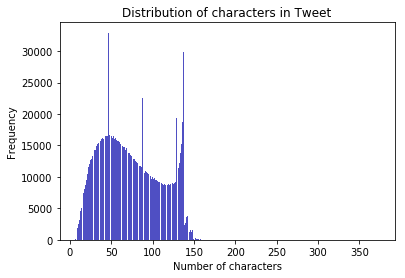

DescribeResult(nobs=1600000, minmax=(6, 374), mean=74.09011125, variance=1327.9565936854945, skewness=0.2710178511454374, kurtosis=-1.020061578256023)

In [11]:
plt.hist(num_characters, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
plt.title('Distribution of characters in Tweet')
plt.ylabel('Frequency');
plt.xlabel('Number of characters');
plt.show()
plt.close()

stats.describe(num_characters)

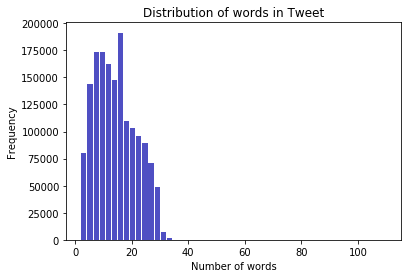

DescribeResult(nobs=1600000, minmax=(2, 110), mean=14.382130625, variance=49.87381048156867, skewness=0.3884119788671588, kurtosis=-0.714251197371599)

In [21]:
plt.hist(num_words, bins=50, color='#0504aa', alpha=0.7, rwidth=0.85)
plt.title('Distribution of words in Tweet')
plt.ylabel('Frequency');
plt.xlabel('Number of words');
plt.show()
plt.close()

stats.describe(num_words)

# Build Classifier

In [7]:
#we transform text sentences into numbers using tfidf from sklearn
#link : http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

from sklearn.feature_extraction.text import TfidfVectorizer

tfv=TfidfVectorizer(min_df=0, max_features=None, strip_accents='unicode',lowercase =True,
                            analyzer='word', token_pattern=r'\w{3,}', ngram_range=(1,1),
                            use_idf=True,smooth_idf=True, sublinear_tf=True, stop_words = "english")   

#we fit the TfidfVectorizer tarnsform the dataset
transformed_data=tfv.fit_transform(data)
print (" dataset trandformed")
print (" dataset shape ", transformed_data.shape)

 dataset trandformed
 dataset shape  (1600000, 681045)


In [8]:
#fit a classifier (Logistic regression) to differentiate between tweets with negative and positive intent.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
#specify model and parameters
model=LogisticRegression(C=1.)
#model=LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')
#fit model
model.fit(transformed_data,target)
#make prediction on the same (train) data
probability_to_be_positive=model.predict_proba(transformed_data)[:,1]
#chcek AUC(Area Undet the Roc Curve) to see how well the score discriminates between negative and positive
print (" auc " , roc_auc_score(target,probability_to_be_positive))
#print top 10 scores as a sanity check
print (probability_to_be_positive[:10])

 auc  0.8950895721859373
[0.11177562 0.04995308 0.56954191 0.08014799 0.40962314 0.55655022
 0.14106204 0.96535143 0.09682061 0.34765325]


In [9]:
#sort results to show some positive ans some negative tweets
import operator
array_with_all_elements=[]
#create a new 2dimensional array to add probability and original text
for i in range (len(probability_to_be_positive)):
    array_with_all_elements.append([data[i],probability_to_be_positive[i] ])

#sort in ascending manner based on prediction
array_with_all_elements=sorted(array_with_all_elements, key=operator.itemgetter(1)) 

print ("===============Printing top negative comments===============")
#print top negative comments            
for i in range (10):
    print ("probability: %f negative comment text: %s" % (array_with_all_elements[i][1],array_with_all_elements[i][0]))  

print ("===============Printing top positive comments===============")
#print top positive comments            
for i in range (len(array_with_all_elements)-1,len(array_with_all_elements)-11,-1 ):
    print ("probability: %f positive comment text: %s" % (array_with_all_elements[i][1],array_with_all_elements[i][0]))  


===============Printing top negative comments===============
probability: 0.000000 negative comment text: sad     .... and i miss u
probability: 0.000000 negative comment text: now im sad i miss PJ 
probability: 0.000000 negative comment text: is sad. i miss u .. 
probability: 0.000001 negative comment text: sick.sad.miss.empty.cry.tears.headache... getting worse.. 
probability: 0.000001 negative comment text: I hate being sad. I wish there was i way to never be sad again. 
probability: 0.000002 negative comment text: sad    Missing you already!!!
probability: 0.000002 negative comment text: Iï¿½m sad JL of Lost is really dead, poor him. 
probability: 0.000002 negative comment text: sad sad sad. . . Missed you already.. 
probability: 0.000002 negative comment text: Have a TERRIBLE headache.  Sad sad.
probability: 0.000002 negative comment text: Sad, sad, sad. I don't know why but I hate this feeling  I wanna sleep and I still can't!
===============Printing top positive comments========

# Save the classifier

In [10]:
import pickle

# save the classifier
with open('./sentiment_classifier/sent140.pkl', 'wb') as fid:
    pickle.dump(model, fid)
    
# save the vectorizer
with open('./sentiment_classifier/vectorizer.pkl', 'wb') as fid:
    pickle.dump(tfv, fid)